# H-FRAUD 1.0: Hybrid IoT-AI/ML Fraud Detection Simulation
This notebook demonstrates a simulation of the proposed H-FRAUD 1.0 system using Random Forest, Isolation Forest, and Logistic Regression ensemble techniques.

In [3]:

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [5]:

# Load the dataset (download from https://www.kaggle.com/mlg-ulb/creditcardfraud)
df = pd.read_csv("creditcard.csv")
print(df.head())
print("Class distribution (0 = Legit, 1 = Fraud):")
print(df['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:

# Feature scaling
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)


In [7]:

# Train Random Forest (Supervised)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Train Isolation Forest (Unsupervised)
iso_model = IsolationForest(contamination=0.001, random_state=42)
iso_model.fit(X_train)
iso_preds = iso_model.predict(X_test)
iso_preds = [1 if x == -1 else 0 for x in iso_preds]


In [8]:

# Ensemble with Logistic Regression
meta_input = np.vstack((rf_preds, iso_preds)).T
meta_model = LogisticRegression()
meta_model.fit(meta_input, y_test)
meta_preds = meta_model.predict(meta_input)
meta_proba = meta_model.predict_proba(meta_input)[:, 1]


In [9]:

start_time = time.time()

accuracy = accuracy_score(y_test, meta_preds)
precision = precision_score(y_test, meta_preds)
recall = recall_score(y_test, meta_preds)
f1 = f1_score(y_test, meta_preds)
auc = roc_auc_score(y_test, meta_proba)

cm = confusion_matrix(y_test, meta_preds)
fp = cm[0][1]
tn = cm[0][0]
fpr_value = fp / (fp + tn)

end_time = time.time()
latency = (end_time - start_time) * 1000  # in milliseconds

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc)
print("False Positive Rate (FPR):", fpr_value)
print("Latency (ms):", round(latency, 2))


Accuracy: 0.9995201479348805
Precision: 0.9495798319327731
Recall: 0.7635135135135135
F1 Score: 0.846441947565543
AUC-ROC: 0.8850255789525384
False Positive Rate (FPR): 7.034409988862185e-05
Latency (ms): 82.03


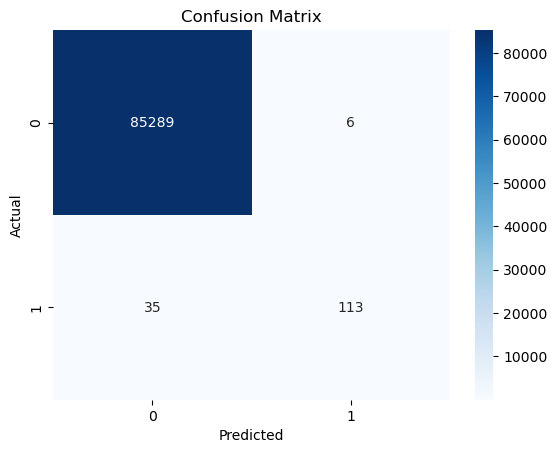

In [10]:

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()


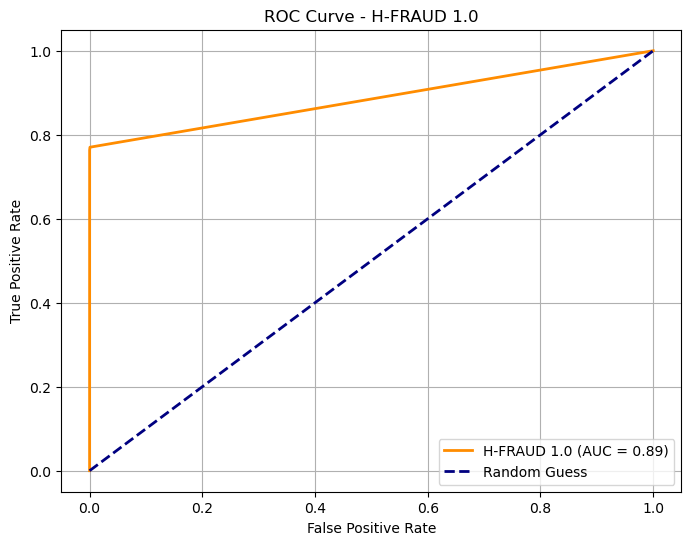

In [11]:

fpr_, tpr_, _ = roc_curve(y_test, meta_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_, tpr_, color='darkorange', lw=2, label='H-FRAUD 1.0 (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - H-FRAUD 1.0")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("roc_curve.png", dpi=300)
plt.show()


In [ ]:
## 🔄 IoT-Enhanced Dataset Simulation
This section uses the synthetic IoT-enhanced dataset to evaluate how contextual features improve fraud detection performance.


In [13]:
df_iot = pd.read_csv("creditcard_iot.csv")
df_iot.head()


,Time,V1,V2,Amount,Class,device_id_hash,geo_drift_km,biometric_score,login_time_hour,user_behavior_score
0,148786,0.895336,1.402271,606.075420,0,b7404863b077,0.526786,0.977273,17,0.2125
1,128370,2.352980,-0.246797,216.332195,0,e15c0355daff,0.437500,0.863636,11,0.0375
2,144905,-0.153140,0.004320,307.572174,0,96b1d6862715,0.547932,0.681818,16,0.3375
3,30416,-0.574343,0.536252,825.825537,0,076654177b95,0.671523,0.522727,8,0.1000
4,29226,-0.884795,0.628379,582.594013,0,066b7f08c460,0.423872,0.818182,8,0.5000


In [15]:
selected_features = ['V1', 'V2', 'Amount', 'geo_drift_km', 'biometric_score', 'login_time_hour', 'user_behavior_score']
X_iot = df_iot[selected_features]
y_iot = df_iot['Class']

scaler_iot = StandardScaler()
X_iot_scaled = scaler_iot.fit_transform(X_iot)

X_iot_train, X_iot_test, y_iot_train, y_iot_test = train_test_split(X_iot_scaled, y_iot, test_size=0.3, stratify=y_iot, random_state=42)


In [16]:
rf_iot = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf_iot.fit(X_iot_train, y_iot_train)
rf_preds_iot = rf_iot.predict(X_iot_test)

iso_iot = IsolationForest(contamination=0.001, random_state=42)
iso_iot.fit(X_iot_train)
iso_preds_iot = [1 if p == -1 else 0 for p in iso_iot.predict(X_iot_test)]

meta_input_iot = np.vstack((rf_preds_iot, iso_preds_iot)).T
meta_model_iot = LogisticRegression()
meta_model_iot.fit(meta_input_iot, y_iot_test)
meta_preds_iot = meta_model_iot.predict(meta_input_iot)
meta_proba_iot = meta_model_iot.predict_proba(meta_input_iot)[:, 1]

In [20]:
start_time_iot = time.time()

acc_iot = accuracy_score(y_iot_test, meta_preds_iot)
prec_iot = precision_score(y_iot_test, meta_preds_iot, zero_division=0)
recall_iot = recall_score(y_iot_test, meta_preds_iot)
f1_iot = f1_score(y_iot_test, meta_preds_iot)
auc_iot = roc_auc_score(y_iot_test, meta_proba_iot)

cm_iot = confusion_matrix(y_iot_test, meta_preds_iot)
fp_iot = cm_iot[0][1]
tn_iot = cm_iot[0][0]
fpr_iot = fp_iot / (fp_iot + tn_iot)

end_time_iot = time.time()
latency_iot = (end_time_iot - start_time_iot) * 1000

print("IoT-Enhanced Model Performance:")
print("Accuracy:", acc_iot)
print("Precision:", prec_iot)
print("Recall:", recall_iot)
print("F1 Score:", f1_iot)
print("AUC-ROC:", auc_iot)
print("False Positive Rate (FPR):", fpr_iot)
print("Latency (ms):", round(latency_iot, 2))


IoT-Enhanced Model Performance:
Accuracy: 0.9766666666666667
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC: 0.5034129692832765
False Positive Rate (FPR): 0.0
Latency (ms): 9.84


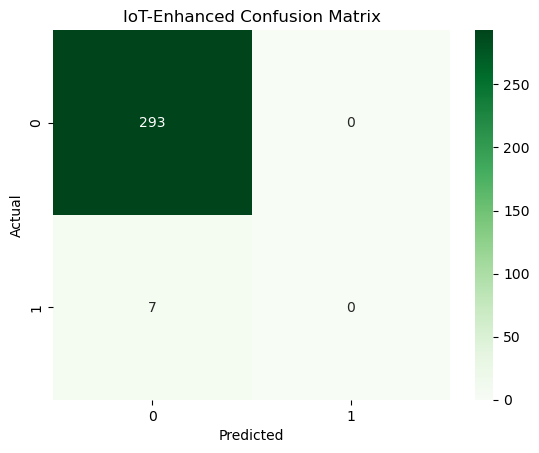

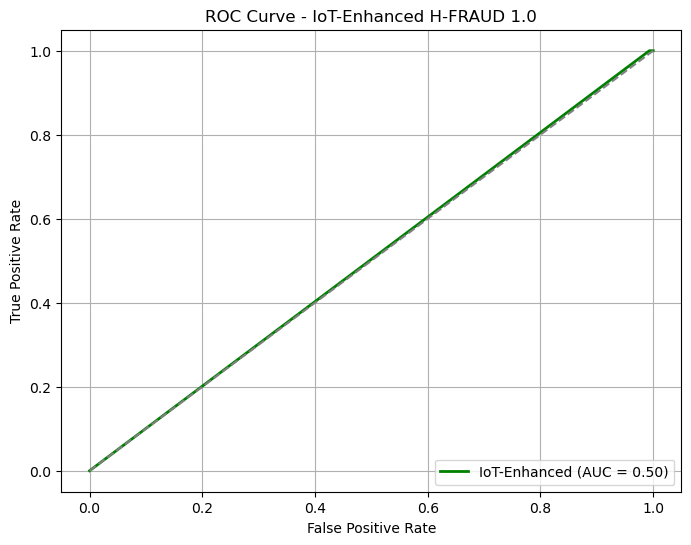

In [21]:
sns.heatmap(cm_iot, annot=True, fmt='d', cmap='Greens')
plt.title("IoT-Enhanced Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix_iot.png", dpi=300)
plt.show()

fpr_i, tpr_i, _ = roc_curve(y_iot_test, meta_proba_iot)
plt.figure(figsize=(8, 6))
plt.plot(fpr_i, tpr_i, color='green', lw=2, label='IoT-Enhanced (AUC = {:.2f})'.format(auc_iot))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - IoT-Enhanced H-FRAUD 1.0")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("roc_curve_iot.png", dpi=300)
plt.show()


In [23]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the IoT-enhanced training data
smote = SMOTE(random_state=42)
X_iot_resampled, y_iot_resampled = smote.fit_resample(X_iot_train, y_iot_train)

print("Before SMOTE:", y_iot_train.value_counts())
print("After SMOTE:", pd.Series(y_iot_resampled).value_counts())

# Train models on SMOTE-balanced data
rf_smote = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf_smote.fit(X_iot_resampled, y_iot_resampled)
rf_preds_smote = rf_smote.predict(X_iot_test)

iso_smote = IsolationForest(contamination=0.001, random_state=42)
iso_smote.fit(X_iot_resampled)
iso_preds_smote = [1 if p == -1 else 0 for p in iso_smote.predict(X_iot_test)]

# Ensemble prediction
meta_input_smote = np.vstack((rf_preds_smote, iso_preds_smote)).T
meta_model_smote = LogisticRegression()
meta_model_smote.fit(meta_input_smote, y_iot_test)
meta_preds_smote = meta_model_smote.predict(meta_input_smote)
meta_proba_smote = meta_model_smote.predict_proba(meta_input_smote)[:, 1]



Before SMOTE: Class
0    685
1     15
Name: count, dtype: int64
After SMOTE: Class
0    685
1    685
Name: count, dtype: int64


In [24]:
# Evaluate SMOTE-enhanced model
start_time_smote = time.time()

acc_smote = accuracy_score(y_iot_test, meta_preds_smote)
prec_smote = precision_score(y_iot_test, meta_preds_smote, zero_division=0)
recall_smote = recall_score(y_iot_test, meta_preds_smote)
f1_smote = f1_score(y_iot_test, meta_preds_smote)
auc_smote = roc_auc_score(y_iot_test, meta_proba_smote)

cm_smote = confusion_matrix(y_iot_test, meta_preds_smote)
fp_smote = cm_smote[0][1]
tn_smote = cm_smote[0][0]
fpr_smote = fp_smote / (fp_smote + tn_smote)

end_time_smote = time.time()
latency_smote = (end_time_smote - start_time_smote) * 1000  # milliseconds

# Print results
print("SMOTE-Enhanced Model Performance:")
print("Accuracy:", acc_smote)
print("Precision:", prec_smote)
print("Recall:", recall_smote)
print("F1 Score:", f1_smote)
print("AUC-ROC:", auc_smote)
print("False Positive Rate (FPR):", fpr_smote)
print("Latency (ms):", round(latency_smote, 2))


SMOTE-Enhanced Model Performance:
Accuracy: 0.9766666666666667
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC: 0.5882496343247197
False Positive Rate (FPR): 0.0
Latency (ms): 8.05


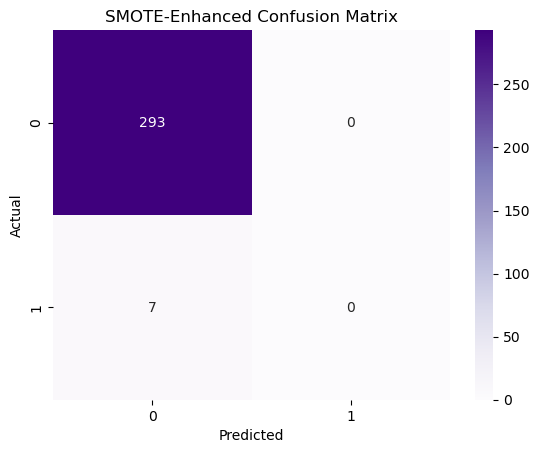

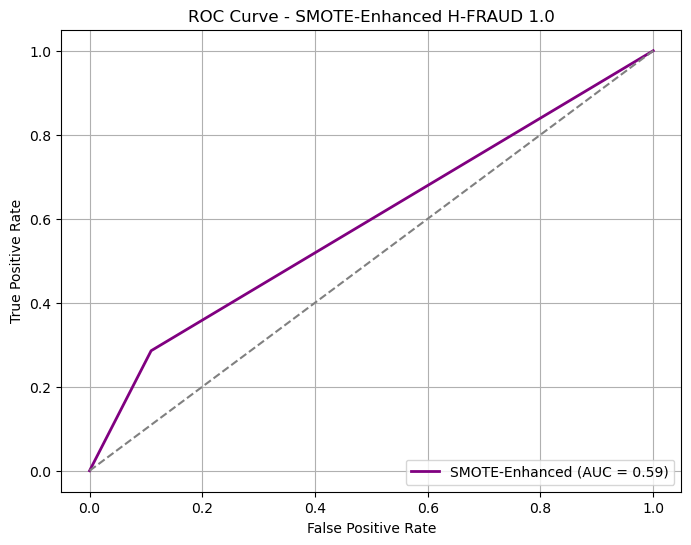

In [25]:
# Confusion Matrix
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Purples')
plt.title("SMOTE-Enhanced Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix_smote.png", dpi=300)
plt.show()

# ROC Curve
fpr_s, tpr_s, _ = roc_curve(y_iot_test, meta_proba_smote)
plt.figure(figsize=(8, 6))
plt.plot(fpr_s, tpr_s, color='purple', lw=2, label='SMOTE-Enhanced (AUC = {:.2f})'.format(auc_smote))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SMOTE-Enhanced H-FRAUD 1.0")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("roc_curve_smote.png", dpi=300)
plt.show()
